<a href="https://colab.research.google.com/github/Bobbyorr007/CUSTOM-TRAINING-BASICS/blob/main/CUSTOM_TRAINING_BASICS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**IMPORTS**

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

**DEFINE THE MODEL**

I defined my model as a class.
- I made x my input tensor.
- I made my model's output to be (wx + b)
- I started off by initializing the values of w and b to random values.
- During training i noticed how the values of w and b got updated in accordance with linear regression so as to minimize the loss inquired by my model
- As i arrived at the optimal values of w and b, my model was able to predict correctly the values of wx + b.


Hence,
w and b are trainable weights of the model,
x is the input
y = wx + b is the output.

In [2]:
class Model(object):
  def __init__(self):
    # I initialize the weights to 1.0 and the bais to 0.5.
    # In practice, these are supposed to be initialized to random values using tf.random.normal
    self.w = tf.Variable(2.0)# Notice how i used tf.Variable to create the weights, if tf.constant was used, the weights wont be updated during training.
    self.b = tf.Variable(1.0)
  
  def __call__(self, x):
    return self.w * x + self.b

model = Model()

**DEFINE A LOSS FUNCTION**

A loss function measures how well the output of a model for a given input matches the target input.

The goal is to minimize this difference during training
I used the standard L2 loss, also know as the least squared errors.

Loss = mean(Ypred - Ytarget)**2

In [3]:
def loss(predicted_y, target_y):
  return tf.reduce_mean(tf.square(predicted_y - target_y))

**OBTAINING THE TRANING DATA**


I first created the training data using the true values of w and b.

Y = Wtrue * X + Btrue

In [4]:
TRUE_w = 3.0
TRUE_b = 2.0
NUM_EXAMPLES = 1000

xs = tf.random.normal(shape=[NUM_EXAMPLES])

ys = (TRUE_w * xs) + TRUE_b


Before I trained the model, I visualized the loss value by plootting the model's predictions in red crosses and the training data in blue dots.

In [5]:
def plot_data(inputs, outputs, predicted_outputs):
  real = plt.scatter(inputs, outputs, c='b', marker = '.')
  predicted = plt.scatter(inputs, predicted_outputs, c = 'r', marker = '+')
  plt.legend((real, predicted), ('Real_data','Predicted_data'))
  plt.show()

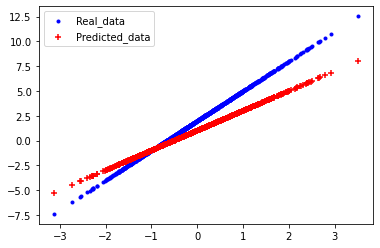

Current loss: 2.020761


In [6]:
plot_data(xs, ys, model(xs))
print('Current loss: %1.6f' % loss(model(xs), ys).numpy())

**DEFINE A TRAINING LOOP**

I used gradient decent in training the model with the network and training data.

- Gradient tape updates the trainable weights **w** and **b** to reduce the loss.

There are so many gradient descent scheme that are captured in tf.train.Optimizer, which is recommended. To understand what happens under the hood using gradient descent, I implemented the maths myself.

I used tf.GradientTape for automatic differentiation.
Use tf.assign_sub for decrementing a value. Note that assign_sub combines tf.assign and tf.sub.

In [7]:
def training_loop(model, inputs, outputs, learning_rate):
  with tf.GradientTape() as t:
    current_loss = loss(model(inputs), outputs)
  dw, db = t.gradient(current_loss, [model.w, model.b])
  model.w.assign_sub(learning_rate, dw)
  model.b.assign_sub(learning_rate, db) 

  return current_loss

Now I ran through the training data iteratively to see how **w** and **b** evolved.

In [8]:
model = Model()

#Collect the history of W-values and b-values to plot later
list_w, list_b = [], []
epochs = range(15)
losses = []
for epoch in epochs:
  list_w.append(model.w.numpy())
  list_b.append(model.b.numpy())
  current_loss = training_loop(model, xs, ys, learning_rate=0.01)
  losses.append(current_loss)
  print( print('Epoch %2d: w=%1.2f b=%1.2f, loss=%2.5f' %
        (epoch, list_w[-1], list_b[-1], current_loss)))


Epoch  0: w=2.00 b=1.00, loss=2.02076
None
Epoch  1: w=1.99 b=0.99, loss=2.06138
None
Epoch  2: w=1.98 b=0.98, loss=2.10240
None
Epoch  3: w=1.97 b=0.97, loss=2.14383
None
Epoch  4: w=1.96 b=0.96, loss=2.18566
None
Epoch  5: w=1.95 b=0.95, loss=2.22789
None
Epoch  6: w=1.94 b=0.94, loss=2.27053
None
Epoch  7: w=1.93 b=0.93, loss=2.31357
None
Epoch  8: w=1.92 b=0.92, loss=2.35702
None
Epoch  9: w=1.91 b=0.91, loss=2.40087
None
Epoch 10: w=1.90 b=0.90, loss=2.44512
None
Epoch 11: w=1.89 b=0.89, loss=2.48978
None
Epoch 12: w=1.88 b=0.88, loss=2.53484
None
Epoch 13: w=1.87 b=0.87, loss=2.58031
None
Epoch 14: w=1.86 b=0.86, loss=2.62618
None


 I plotted the progression of trainable variables over epochs

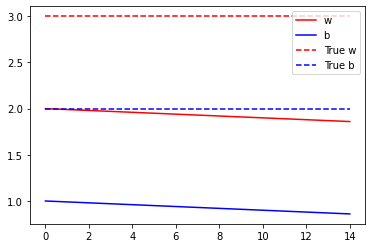

In [12]:
plt.plot(epochs, list_w, 'r',
       epochs, list_b, 'b')
plt.plot([TRUE_w] * len(epochs), 'r--',
      [TRUE_b] * len(epochs), 'b--')
plt.legend(['w', 'b', 'True w', 'True b'])
plt.show()

**PLOTS FOR EVALUATION**

I plotted the actual outputs in red and the model's predictions in blue on a set of random test examples.

I observed that the model was able to make fairly accurate predictions on random test examples.

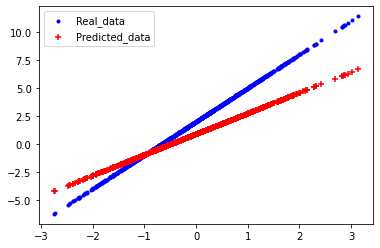

In [13]:
test_inputs = tf.random.normal(shape=[NUM_EXAMPLES])
test_outputs = test_inputs * TRUE_w + TRUE_b

predicted_test_outputs = model(test_inputs)
plot_data(test_inputs, test_outputs, predicted_test_outputs)

**Visualize the cost function against the values of each of the trainable weights the model approximated to over time.**

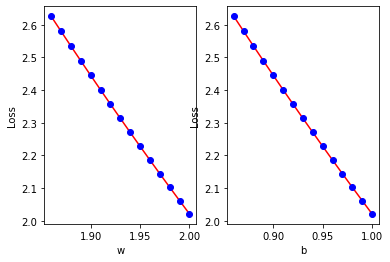

In [14]:
def plot_loss_for_weights(weights_list, losses):
  for idx, weights in enumerate(weights_list):
    plt.subplot(120 + idx + 1)
    plt.plot(weights['values'], losses, 'r')
    plt.plot(weights['values'], losses, 'bo')
    plt.xlabel(weights['name'])
    plt.ylabel('Loss')
    
    
weights_list = [{ 'name' : "w",
                  'values' : list_w
                },
                {
                  'name' : "b",
                  'values' : list_b
                }]

plot_loss_for_weights(weights_list, losses)